In [17]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Load the dataset
df = pd.read_csv("tcs1.csv")

In [19]:

# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1089 non-null   object 
 1   Open    1089 non-null   float64
 2   High    1089 non-null   float64
 3   Low     1089 non-null   float64
 4   Close   1089 non-null   float64
 5   Volume  1089 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 51.2+ KB
None


In [20]:
# Display summary statistics of numerical columns
print(df.describe())

              Open         High          Low        Close        Volume
count  1089.000000  1089.000000  1089.000000  1089.000000  1.089000e+03
mean      7.488043     7.701307     7.274125     7.480422  5.600249e+05
std       3.683128     3.791441     3.566510     3.675420  5.947805e+05
min       1.800000     2.050000     1.800000     1.990000  7.382300e+04
25%       4.370000     4.510000     4.290000     4.370000  2.529910e+05
50%       7.020000     7.190000     6.840000     7.040000  3.909750e+05
75%      10.070000    10.350000     9.840000    10.030000  6.295960e+05
max      19.150000    19.310000    17.780000    19.190000  6.846249e+06


In [21]:
# Check for missing values
print(df.isnull().sum())

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


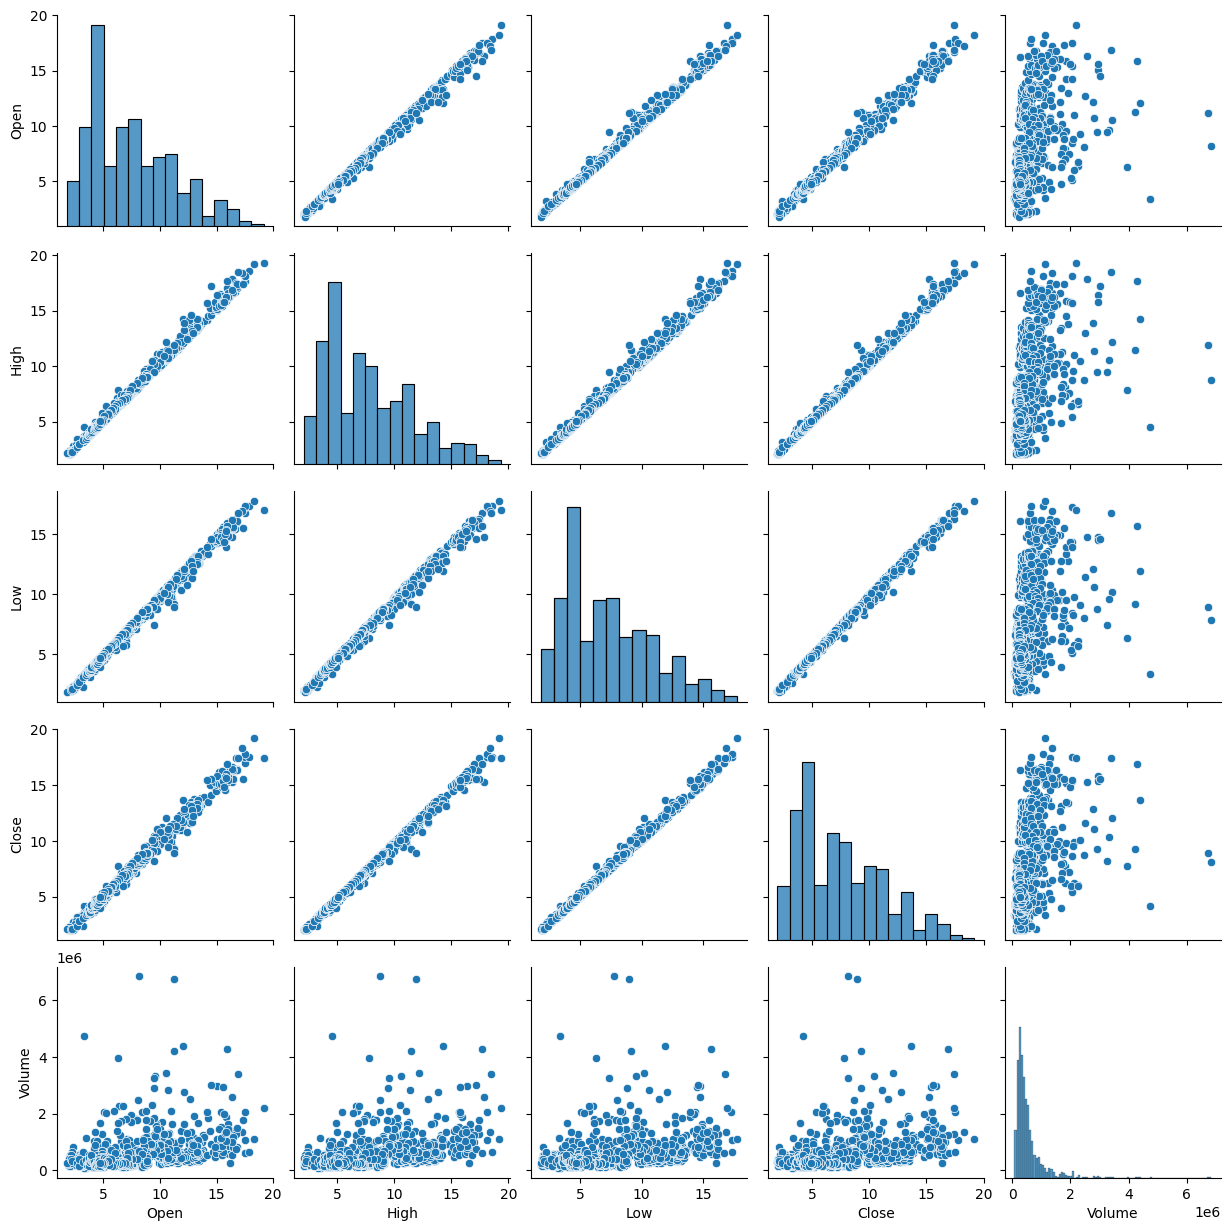

In [22]:
# Visualize the distribution of numerical features
sns.pairplot(df[['Open', 'High', 'Low', 'Close', 'Volume']])
plt.show()

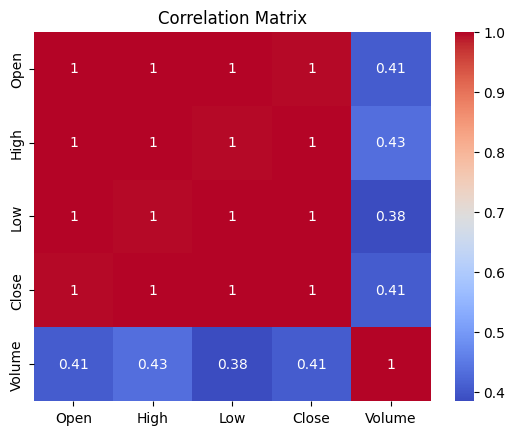

In [23]:
# Check for correlation between features
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

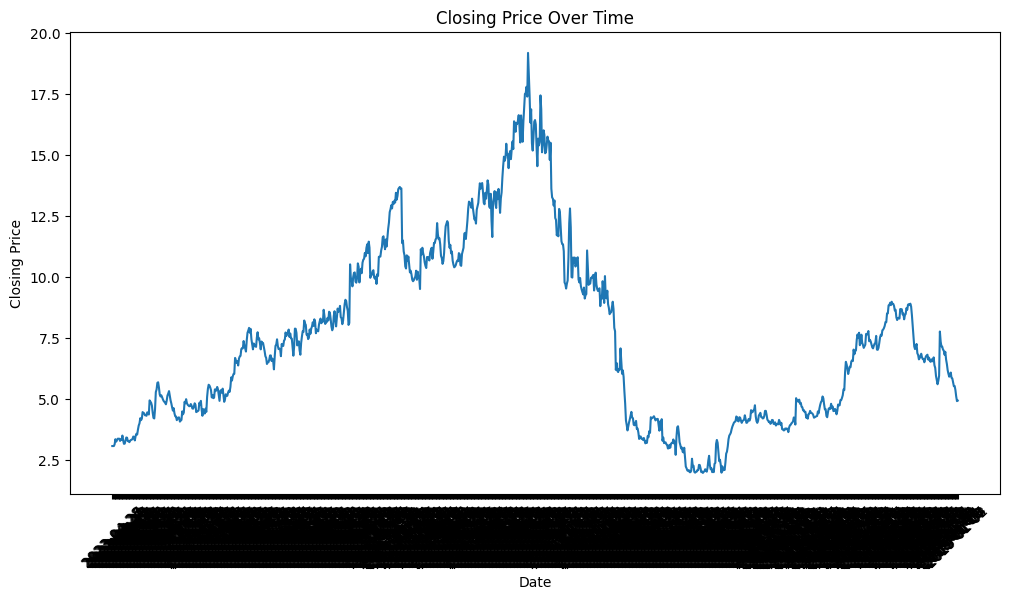

In [24]:
# Visualize the closing price over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'])
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.show()

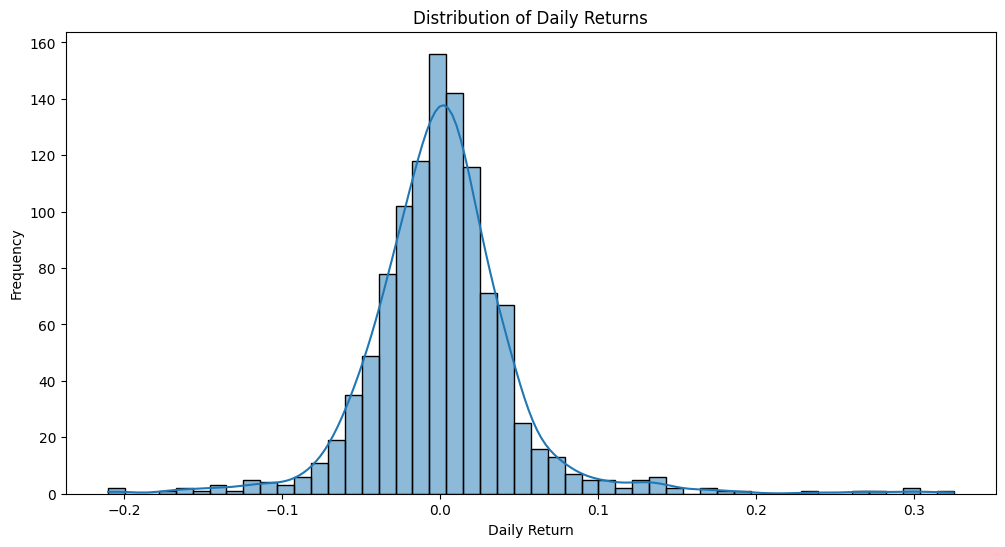

In [25]:
# Calculate daily returns
df['Daily_Return'] = df['Close'].pct_change()

# Visualize the distribution of daily returns
plt.figure(figsize=(12, 6))
sns.histplot(df['Daily_Return'].dropna(), bins=50, kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

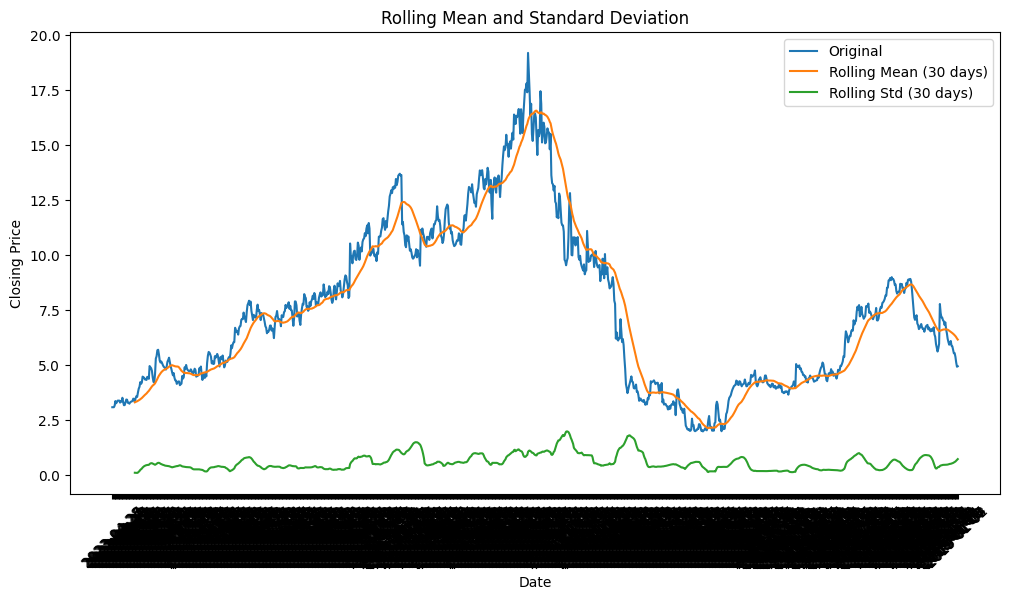

In [26]:
# Plot rolling statistics
rolling_mean = df['Close'].rolling(window=30).mean()
rolling_std = df['Close'].rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Original')
plt.plot(df['Date'], rolling_mean, label='Rolling Mean (30 days)')
plt.plot(df['Date'], rolling_std, label='Rolling Std (30 days)')
plt.title('Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [31]:
! pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


T-statistic: -9.504442732519665
P-value: 1.2395576922694603e-20


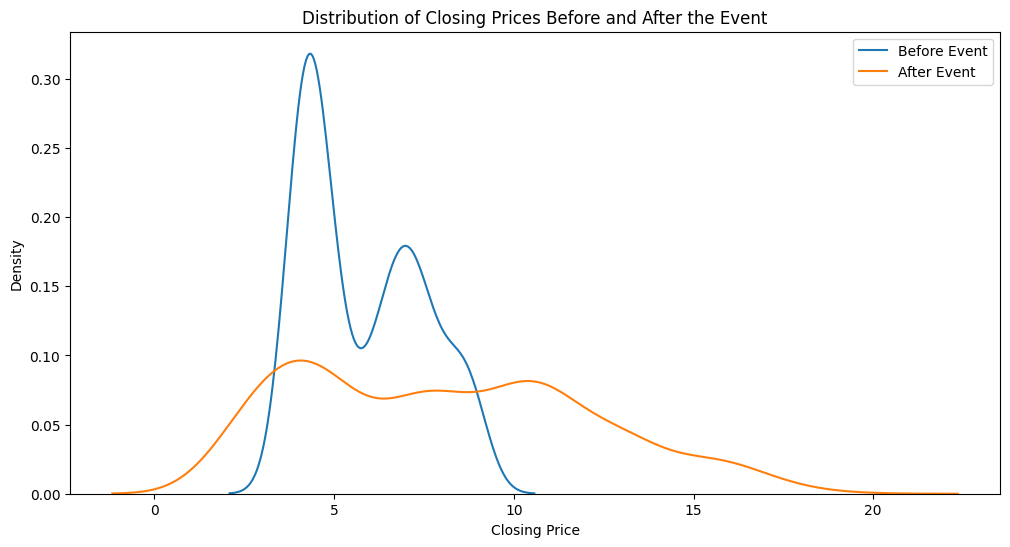

In [33]:
# Hypothesis Testing (Alternative)
from scipy.stats import ttest_ind

event_date = '2020-03-01'
before_event = df[df['Date'] < event_date]['Close']
after_event = df[df['Date'] >= event_date]['Close']

t_stat, p_value = ttest_ind(before_event, after_event)
print('T-statistic:', t_stat)
print('P-value:', p_value)

# Visualize the closing price before and after the event
plt.figure(figsize=(12, 6))
sns.kdeplot(before_event, label='Before Event')
sns.kdeplot(after_event, label='After Event')
plt.title('Distribution of Closing Prices Before and After the Event')
plt.xlabel('Closing Price')
plt.ylabel('Density')
plt.legend()
plt.show()


In [35]:
import plotly.graph_objects as go

# Create Candlestick Chart
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.update_layout(title='Candlestick Chart for TCS Stock',
                  xaxis_title='Date',
                  yaxis_title='Stock Price',
                  xaxis_rangeslider_visible=False)
fig.show()

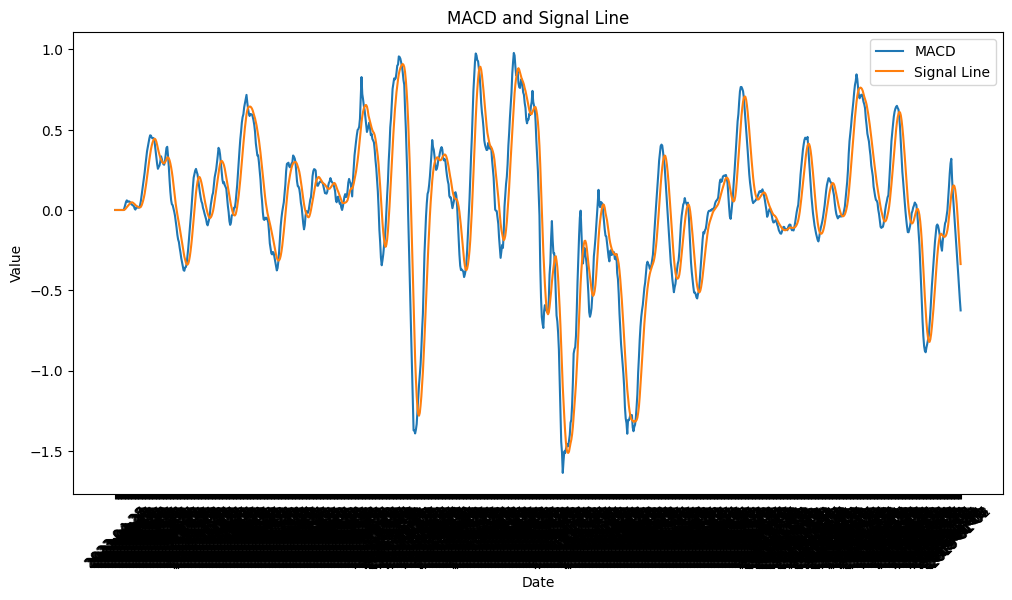

In [36]:
# Calculate MACD
short_window = 12
long_window = 26
signal_window = 9

df['Short_MA'] = df['Close'].rolling(window=short_window, min_periods=1).mean()
df['Long_MA'] = df['Close'].rolling(window=long_window, min_periods=1).mean()

df['MACD'] = df['Short_MA'] - df['Long_MA']
df['Signal_Line'] = df['MACD'].rolling(window=signal_window, min_periods=1).mean()

# Plot MACD
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['MACD'], label='MACD')
plt.plot(df['Date'], df['Signal_Line'], label='Signal Line')
plt.title('MACD and Signal Line')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.show()

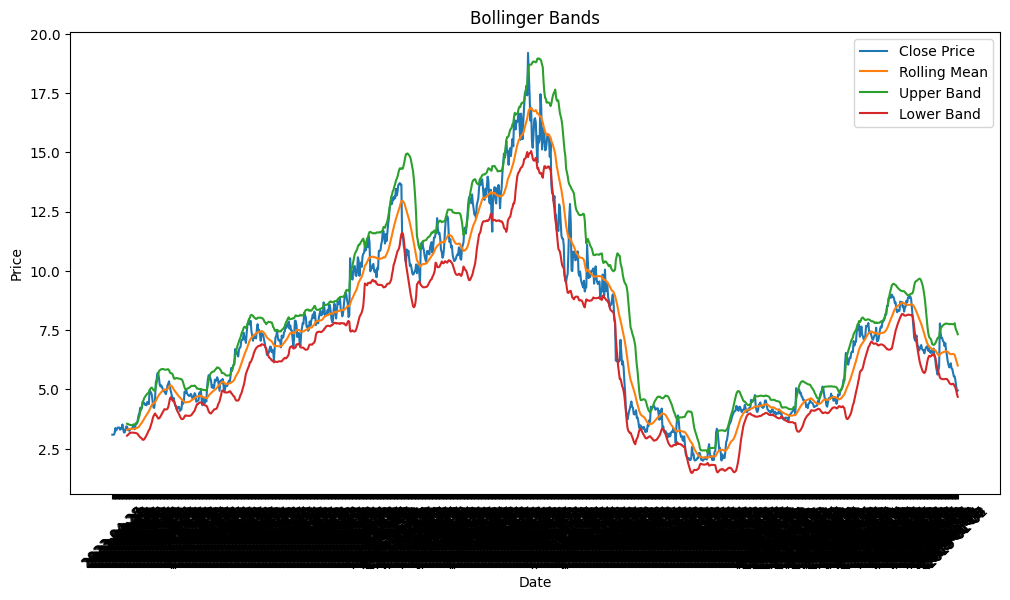

In [37]:
# Calculate Bollinger Bands
window = 20
df['Rolling_Mean'] = df['Close'].rolling(window=window).mean()
df['Upper_Band'] = df['Rolling_Mean'] + 2 * df['Close'].rolling(window=window).std()
df['Lower_Band'] = df['Rolling_Mean'] - 2 * df['Close'].rolling(window=window).std()

# Plot Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['Rolling_Mean'], label='Rolling Mean')
plt.plot(df['Date'], df['Upper_Band'], label='Upper Band')
plt.plot(df['Date'], df['Lower_Band'], label='Lower Band')
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()